import libraries


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


1-Data Collection


In [2]:


# plots will have a white background with light grid lines
sns.set_style("whitegrid")

# Trying different encodings to avoid errors from appearing 
encodings_to_try = ['latin-1', 'iso-8859-1', 'cp1252', 'windows-1252']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv("Original Data.csv", encoding=encoding)
        print(f"Successfully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed with encoding: {encoding}")
        continue

# Convert 'Order Date' to datetime format so python can understand
# (errors="coerce")If there’s a bad/missing date, it will turn it into NaT (Not a Time) instead of crashing
#dayfirst=true reads date in european format
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce", dayfirst=True)

df.head()

Successfully read with encoding: latin-1


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [3]:
df.describe()

,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
min,1.00000,2011-01-01 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,2012-06-19 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804


In [4]:
df.drop(columns=['Row ID' ,'Order ID' ,'Customer ID','Postal Code','Product ID'] ,inplace=True)

In [5]:
# Convert Order Date to DateTime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Convert Ship Date to Date time
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [6]:
from pandas.tseries.holiday import USFederalHolidayCalendar

df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter 
df['Year'] =df['Order Date'].dt.year
df['Day_of_Week'] = df['Order Date'].dt.dayofweek
df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6]).astype(int)  # 5 and 6 correspond to Fri and Sat

# Add holiday feature
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=df['Order Date'].min(), end=df['Order Date'].max())
df['Is_Holiday'] = df['Order Date'].isin(holidays).astype(int)

# Add season feature
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                                'Spring' if x in [3, 4, 5] else
                                                'Summer' if x in [6, 7, 8] else
                                                'Fall')
df['Season'] = df['Season'].astype('category')

# Add total sales feature
df['Total_sales'] = (df['Sales']) * (df['Quantity'])

In [7]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Shipping Cost,Order Priority,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday,Season,Total_sales
0,2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,...,933.57,Critical,7,3,2012,1,0,0,Summer,16167.550
1,2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,...,923.63,Critical,2,1,2013,1,0,0,Winter,33384.555
2,2013-10-17,2013-10-18,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,...,915.49,Medium,10,4,2013,3,0,0,Fall,46576.539
3,2013-01-28,2013-01-30,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,...,910.16,Medium,1,1,2013,0,0,0,Winter,14462.550
4,2013-11-05,2013-11-06,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,...,903.04,Critical,11,4,2013,1,0,0,Fall,22663.680


In [11]:
num_records = df.shape[0]
print(f"> Number of records in the dataset: {num_records}")

> Number of records in the dataset: 51290


In [12]:
total_sales = df['Sales'].sum()
print(f"> Total Sales Revenue: ${total_sales:,.2f}")

> Total Sales Revenue: $12,642,501.91


In [13]:
total_profit = df['Profit'].sum()
print(f"> Total Profit: ${total_profit:,.2f}")

> Total Profit: $1,467,457.29


In [14]:
total_discounts = df['Discount'].sum()
print(f"> Total Discounts Given: {total_discounts:.2f}")

> Total Discounts Given: 7329.73


In [15]:
average_sales = df['Sales'].mean()
print(f"> Average Sales per Order: ${average_sales:.2f}")

> Average Sales per Order: $246.49


In [16]:
category_sales = df.groupby('Category')['Sales'].sum().round(2).sort_values(ascending=False)
category_sales = pd.DataFrame(category_sales).reset_index()
category_sales.index += 1
category_sales

,Category,Sales
1,Technology,4744557.50
2,Furniture,4110874.19
3,Office Supplies,3787070.23


In [17]:
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
subcategory_sales = pd.DataFrame(subcategory_sales).reset_index()
subcategory_sales.index += 1
subcategory_sales.head()

,Sub-Category,Sales
1,Phones,1.706824e+06
2,Copiers,1.509436e+06
3,Chairs,1.501682e+06
4,Bookcases,1.466572e+06
5,Storage,1.127086e+06


In [18]:
subcategory_quantity = df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False)
subcategory_quantity = pd.DataFrame(subcategory_quantity).reset_index()
subcategory_quantity.index +=1
subcategory_quantity.head()

,Sub-Category,Quantity
1,Binders,21429
2,Storage,16917
3,Art,16301
4,Paper,12822
5,Chairs,12336


In [19]:
shipping_mode = df['Ship Mode'].value_counts()
shipping_mode = pd.DataFrame(shipping_mode)
shipping_mode

,count
Ship Mode,
Standard Class,30775
Second Class,10309
First Class,7505
Same Day,2701


In [20]:
region_sales = df.groupby('Region')['Sales'].sum().round(2).sort_values(ascending=False)
region_sales = pd.DataFrame(region_sales)
region_sales

,Sales
Region,
Central,2822302.52
South,1600907.04
North,1248165.60
Oceania,1100184.61
Southeast Asia,884423.17
North Asia,848309.78
EMEA,806161.31
Africa,783773.21
Central Asia,752826.57


In [21]:
region_profit = df.groupby('Region')['Profit'].sum().round(2).sort_values(ascending=False)
region_profit = pd.DataFrame(region_profit)
region_profit

,Profit
Region,
Central,311403.98
North,194597.95
North Asia,165578.42
South,140355.77
Central Asia,132480.19
Oceania,120089.11
West,108418.45
East,91522.78
Africa,88871.63


In [22]:
top_profitable_products = df.groupby('Product Name')['Profit'].sum().round(2).sort_values(ascending=False).head()
top_profitable_products = pd.DataFrame(top_profitable_products).reset_index()
top_profitable_products.index += 1
top_profitable_products

,Product Name,Profit
1,Canon imageCLASS 2200 Advanced Copier,25199.93
2,"Cisco Smart Phone, Full Size",17238.52
3,"Motorola Smart Phone, Full Size",17027.11
4,"Hoover Stove, Red",11807.97
5,"Sauder Classic Bookcase, Traditional",10672.07


In [23]:
least_profitable_products = df.groupby('Product Name')['Profit'].sum().sort_values().head(5)
least_profitable_products = pd.DataFrame(least_profitable_products).reset_index()
least_profitable_products.index += 1
least_profitable_products

,Product Name,Profit
1,Cubify CubeX 3D Printer Double Head Print,-8879.9704
2,Lexmark MX611dhe Monochrome Laser Printer,-4589.9730
3,"Motorola Smart Phone, Cordless",-4447.0380
4,Cubify CubeX 3D Printer Triple Head Print,-3839.9904
5,"Bevis Round Table, Adjustable Height",-3649.8940


In [24]:
customer_sales = df.groupby('Customer Name')['Sales'].sum().round(2).sort_values(ascending=False).head(10)
customer_sales = pd.DataFrame(customer_sales).reset_index()
customer_sales.index += 1
print("Top 10 Customers by Total Sales:")
customer_sales

Top 10 Customers by Total Sales:


,Customer Name,Sales
1,Tom Ashbrook,40488.07
2,Tamara Chand,37457.33
3,Greg Tran,35550.95
4,Christopher Conant,35187.08
5,Sean Miller,35170.93
6,Bart Watters,32310.45
7,Natalie Fritzler,31781.26
8,Fred Hopkins,30400.67
9,Jane Waco,30288.45
10,Hunter Lopez,30243.57


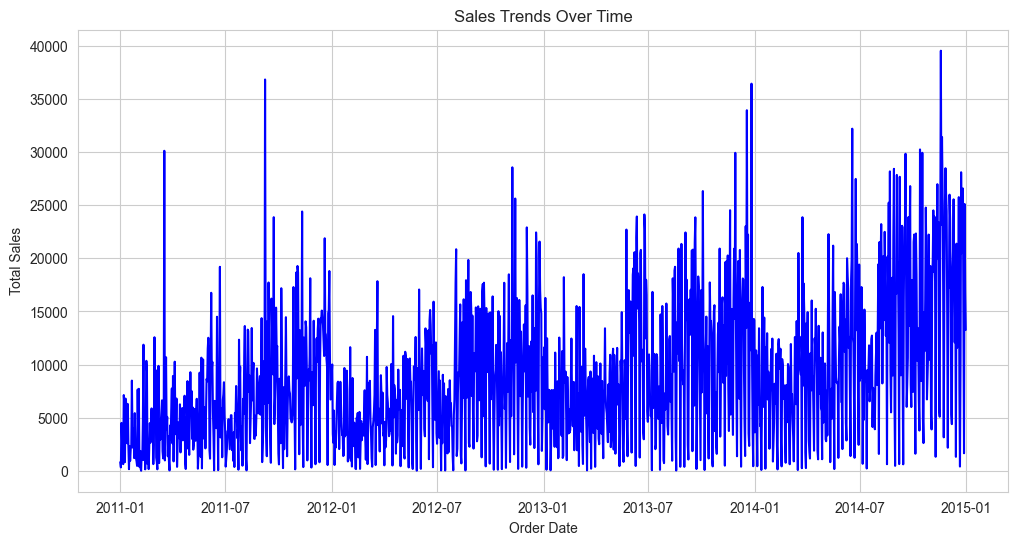

In [8]:
# Group sales by order date
#Within each group (each date), we take the "Sales" column and sum it up
sales_trend = df.groupby("Order Date")["Sales"].sum().reset_index()

# Plot line chart
plt.figure(figsize=(12,6)) #Creates a new blank figure with 12 inches wide and 6 inches tall
plt.plot(sales_trend["Order Date"], sales_trend["Sales"], color="blue") #time series line plot of sales over dates.
plt.title("Sales Trends Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.show()


In [25]:
region_avg_order = df.groupby('Region')['Sales'].mean().round(2).sort_values(ascending=False)
region_avg_order = pd.DataFrame(region_avg_order)
region_avg_order

,Sales
Region,
Central Asia,367.59
North Asia,362.84
Oceania,315.51
Southeast Asia,282.65
North,260.85
Central,253.87
South,240.92
East,238.34
West,226.49


In [9]:
df.shape

(51290, 27)

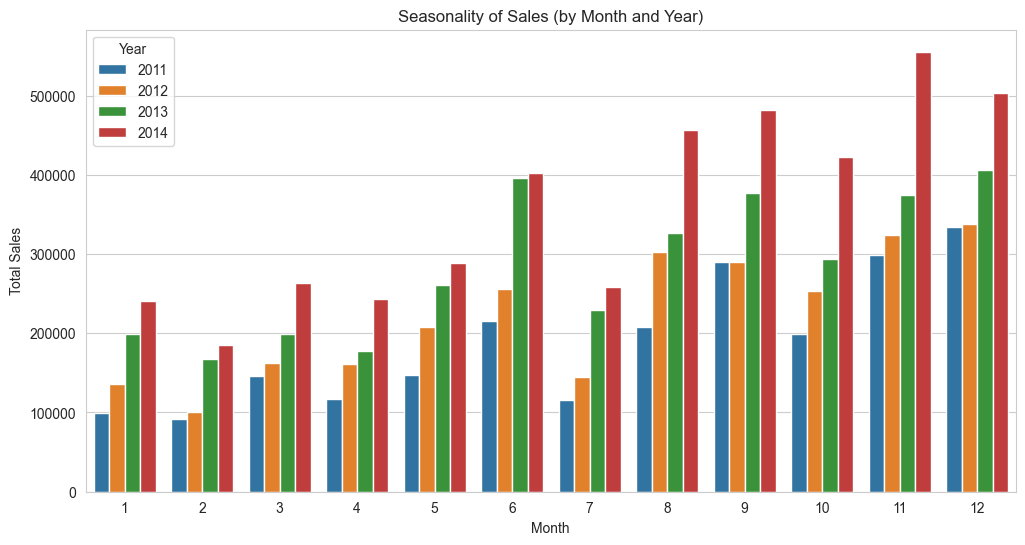

In [10]:
# Extract Year and Month from Order Date
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month

# Group sales & profit by Year-Month
monthly_sales = df.groupby(["Year","Month"])[["Sales","Profit"]].sum().reset_index()

# Plot monthly sales
plt.figure(figsize=(12,6))
sns.barplot(x="Month", y="Sales", hue="Year", data=monthly_sales, palette="tab10") #hue="Year" Different colors for different years ,,palette="tab10" Nice 10-color palette for different years
plt.title("Seasonality of Sales (by Month and Year)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title="Year") #legend to show which color corresponds to which year
plt.show()


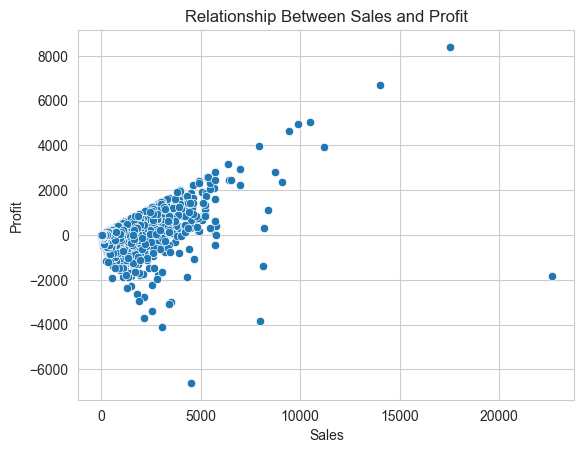

In [26]:
sns.scatterplot(x = df['Sales'], y = df['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Relationship Between Sales and Profit')
plt.show()

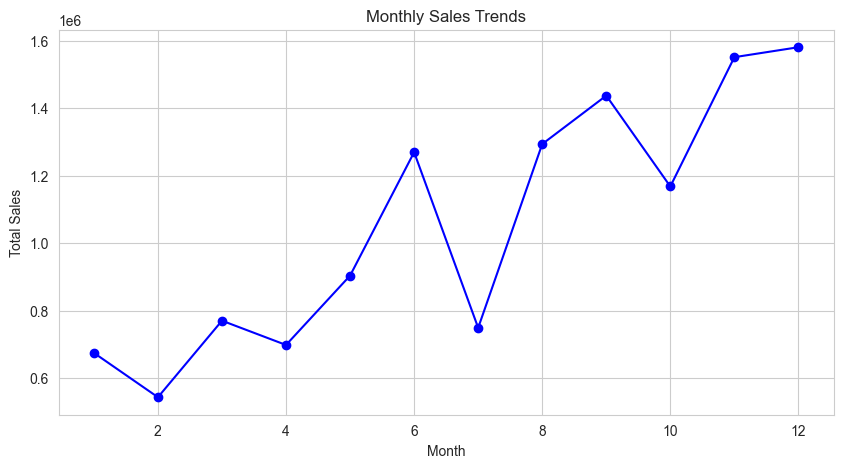

In [27]:
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(marker='o', linestyle='-', color='blue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.show()

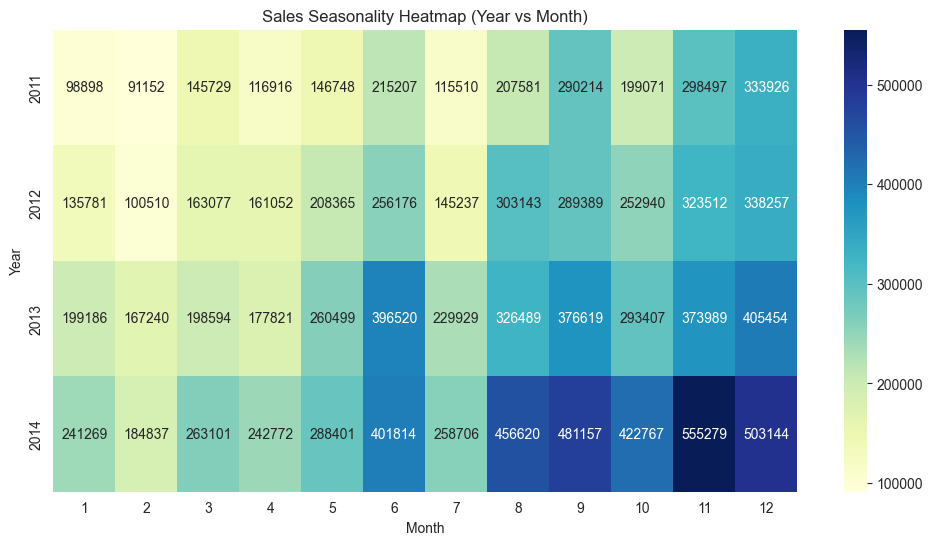

In [ ]:
#Turns the grouped data into a matrix
# Pivot the data: rows = Year, columns = Month, values = total Sales
sales_pivot = monthly_sales.pivot(index="Year", columns="Month", values="Sales")

# Plot heatmap
#Each cell represents Sales in that Year & Month.
#annot=True  Writes the sales numbers inside each cell.
plt.figure(figsize=(12,6))
sns.heatmap(sales_pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Sales Seasonality Heatmap (Year vs Month)")
plt.xlabel("Month")#X-axis = months (1 - Jan, 12 - Dec).
plt.ylabel("Year")#Y-axis = years (2011, 2012, 2013…)
plt.show()
#Darker = higher sales
#Brighter=lower sales


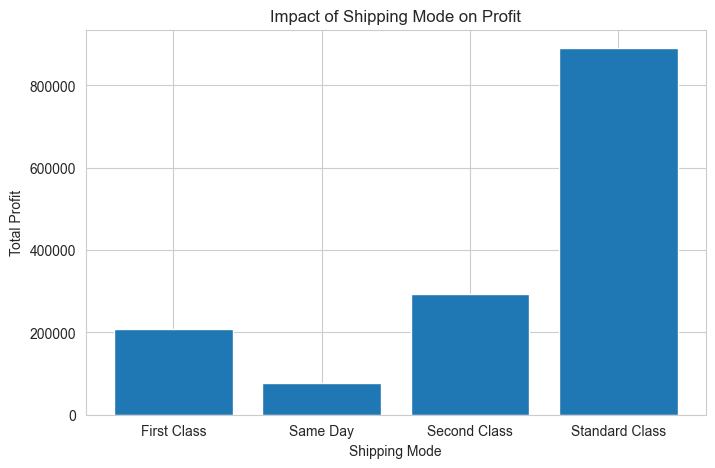

In [28]:
shipping_profit = df.groupby('Ship Mode')['Profit'].sum()
plt.figure(figsize=(8, 5))
plt.bar(shipping_profit.index, shipping_profit.values)
plt.xlabel('Shipping Mode')
plt.ylabel('Total Profit')
plt.title('Impact of Shipping Mode on Profit')
plt.show()

In [29]:
avg_discount_category = df.groupby('Category')['Discount'].mean().round(4)
avg_discount_category = pd.DataFrame(avg_discount_category)
avg_discount_category

,Discount
Category,
Furniture,0.1681
Office Supplies,0.1374
Technology,0.1353


In [30]:
top_cities_sales = df.groupby('City')['Sales'].sum().round(2).sort_values(ascending=False).head(5)
top_cities_sales = pd.DataFrame(top_cities_sales).reset_index()
top_cities_sales.index += 1
print("Top 5 Cities with Highest Sales:")
top_cities_sales

Top 5 Cities with Highest Sales:


,City,Sales
1,New York City,256368.16
2,Los Angeles,175851.34
3,Manila,120886.95
4,Seattle,119540.74
5,San Francisco,112669.09


In [31]:
holiday_impact = df.groupby("Is_Holiday")[["Sales", "Profit"]].mean().round(2)
holiday_impact = pd.DataFrame(holiday_impact)
print("Average Sales & Profit: Holiday vs. Non-Holiday:")
holiday_impact

Average Sales & Profit: Holiday vs. Non-Holiday:


,Sales,Profit
Is_Holiday,,
0,245.72,28.42
1,267.77,33.93


In [32]:
weekend_impact = df.groupby("Is_Weekend")[["Sales", "Profit"]].mean().round(3)
weekend_impact = pd.DataFrame(weekend_impact)
print("Average Sales & Profit: Weekend vs. Weekday:")
weekend_impact

Average Sales & Profit: Weekend vs. Weekday:


,Sales,Profit
Is_Weekend,,
0,245.893,28.444
1,251.395,29.986


In [33]:
top_products = df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False).head(5)
top_products = pd.DataFrame(top_products)
print("\nTop 5 Most Ordered Products:\n")
top_products


Top 5 Most Ordered Products:



,Quantity
Product Name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259


In [34]:
least_products = df.groupby("Product Name")["Quantity"].sum().sort_values().head(5)
least_products = pd.DataFrame(least_products)
print("\nLeast Ordered Products:\n") 
least_products


Least Ordered Products:



,Quantity
Product Name,
Penpower WorldCard Pro Card Scanner,1
Boston 1900 Electric Pencil Sharpener,1
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1
"Chromcraft Training Table, Adjustable Height",1
Xerox 20,1


In [35]:
seasonal_shipping = df.groupby("Season", observed=False)["Shipping Cost"].mean().sort_values(ascending=False)
seasonal_shipping = pd.DataFrame(seasonal_shipping)
print("\nAverage Shipping Cost by Season:\n")
seasonal_shipping


Average Shipping Cost by Season:



,Shipping Cost
Season,
Winter,27.285037
Fall,26.265491
Summer,26.255096
Spring,25.708465


In [ ]:
holiday_impact = sales.groupby("Is_Holiday")[["Sales", "Profit"]].mean().round(2)
holiday_impact = pd.DataFrame(holiday_impact)
print("Average Sales & Profit: Holiday vs. Non-Holiday:")
holiday_impact

In [36]:
high_shipping_states = df.groupby("State")["Shipping Cost"].mean().sort_values(ascending=False).head(5)
high_shipping_states = pd.DataFrame(high_shipping_states)
print("\nStates with Highest Average Shipping Cost:\n")
high_shipping_states


States with Highest Average Shipping Cost:



,Shipping Cost
State,
Paysandú,634.530
Elbasan,301.730
Hidalgo,229.865
Bekes,190.315
Sikasso,184.600


In [37]:

df["Shipping Time (Days)"] = (df["Ship Date"] - df["Order Date"]).dt.days

# Find fastest and slowest deliveries
fastest_shipping = df.sort_values(by="Shipping Time (Days)").head(5)
slowest_shipping = df.sort_values(by="Shipping Time (Days)", ascending=False).head(5)

print("\nTop 5 Fastest Shipped Orders:\n")
fastest_shipping[["Order Date", "Ship Date", "Ship Mode", "Shipping Time (Days)"]]


Top 5 Fastest Shipped Orders:



,Order Date,Ship Date,Ship Mode,Shipping Time (Days)
0,2012-07-31,2012-07-31,Same Day,0
2354,2014-11-11,2014-11-11,Same Day,0
12704,2012-07-06,2012-07-06,Same Day,0
12699,2013-09-27,2013-09-27,Same Day,0
12692,2014-11-10,2014-11-10,Same Day,0


In [38]:
print("\nTop 5 Slowest Shipped Orders:\n")
slowest_shipping[["Order Date", "Ship Date", "Ship Mode", "Shipping Time (Days)"]]


Top 5 Slowest Shipped Orders:



,Order Date,Ship Date,Ship Mode,Shipping Time (Days)
15060,2014-04-03,2014-04-10,Standard Class,7
5025,2014-06-12,2014-06-19,Standard Class,7
31905,2014-05-08,2014-05-15,Standard Class,7
37990,2012-11-19,2012-11-26,Standard Class,7
32236,2013-06-10,2013-06-17,Standard Class,7


In [39]:
missing_values = pd.DataFrame(df.isna().sum())
missing_values

,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer Name,0
Segment,0
City,0
State,0
Country,0
Market,0
Region,0


In [40]:
duplicates_values = df.duplicated().sum()
print(f"Number of Duplicates Values = {duplicates_values}")

Number of Duplicates Values = 0


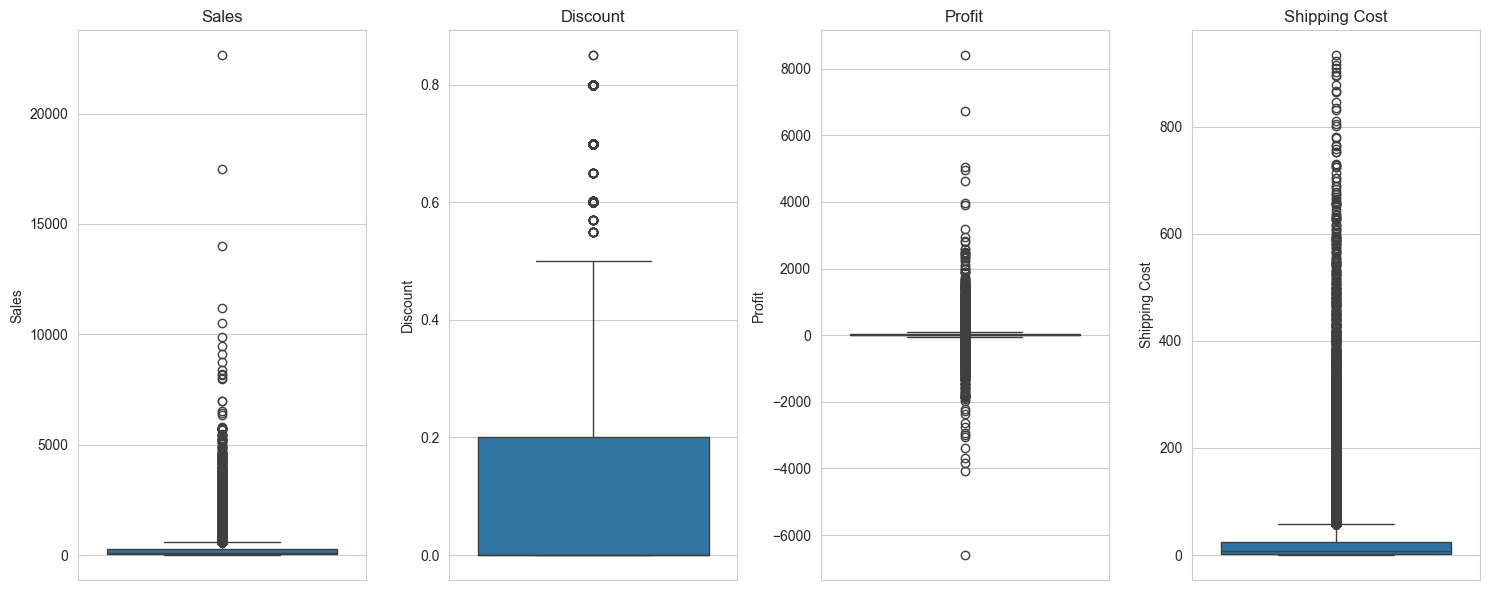

Outliers In Each Column: {'Sales': 5655, 'Discount': 4172, 'Profit': 9755, 'Shipping Cost': 5909}


In [41]:
numeric_columns = ["Sales", "Discount", "Profit", "Shipping Cost"]

# Plot Outliers in each numerical column
plt.figure(figsize=(15, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# Calculate IQR
outliers = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

print("Outliers In Each Column:", outliers)

In [42]:
df.describe(include=['number'])

,Sales,Quantity,Discount,Profit,Shipping Cost,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday,Total_sales,Shipping Time (Days)
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915,7.522636,2.793235,2012.777208,2.343264,0.108598,0.034900,1205.327987,3.969370
std,487.565361,2.278766,0.212280,174.340972,57.296804,3.300056,1.066015,1.098931,1.671486,0.311137,0.183527,3452.079528,1.729437
min,0.444000,1.000000,0.000000,-6599.978000,0.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000,0.444000,0.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,5.000000,2.000000,2012.000000,1.000000,0.000000,0.000000,66.930000,3.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,8.000000,3.000000,2013.000000,2.000000,0.000000,0.000000,245.772000,4.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,10.000000,4.000000,2014.000000,4.000000,0.000000,0.000000,904.875000,5.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,12.000000,4.000000,2014.000000,6.000000,1.000000,1.000000,135830.880000,7.000000


In [43]:
Basic_Statistics = df.describe(include=['number']).T
Basic_Statistics['skew'] = df.select_dtypes(include=['number']).apply(lambda x: x.skew())
Basic_Statistics['kurt'] = df.select_dtypes(include=['number']).apply(lambda x: x.kurt())
Basic_Statistics['median'] = df.select_dtypes(include=['number']).apply(lambda x: x.median())
Basic_Statistics['variance'] = df.select_dtypes(include=['number']).apply(lambda x: x.var())
Basic_Statistics['mode'] = df.select_dtypes(include=['number']).apply(lambda x: x.mode().values[0])
Basic_Statistics['range'] = Basic_Statistics['max'] - Basic_Statistics['min']
Basic_Statistics = Basic_Statistics[['count', 'mean', 'std', 'skew', 'kurt', 'min', '25%', '50%', '75%', 'max', 'range', 'mode', 'variance']]
Basic_Statistics

,count,mean,std,skew,kurt,min,25%,50%,75%,max,range,mode,variance
Sales,51290.0,246.490581,487.565361,8.138080,176.731200,0.444,30.758625,85.053,251.0532,22638.480,22638.036,12.96,2.377200e+05
Quantity,51290.0,3.476545,2.278766,1.360368,2.275889,1.000,2.000000,3.000,5.0000,14.000,13.000,2.00,5.192776e+00
Discount,51290.0,0.142908,0.212280,1.387775,0.716682,0.000,0.000000,0.000,0.2000,0.850,0.850,0.00,4.506277e-02
Profit,51290.0,28.610982,174.340972,4.157189,291.411090,-6599.978,0.000000,9.240,36.8100,8399.976,14999.954,0.00,3.039477e+04
Shipping Cost,51290.0,26.375915,57.296804,5.863226,50.020158,0.000,2.610000,7.790,24.4500,933.570,933.570,0.86,3.282924e+03
Month,51290.0,7.522636,3.300056,-0.357971,-0.977879,1.000,5.000000,8.000,10.0000,12.000,11.000,11.00,1.089037e+01
Quarter,51290.0,2.793235,1.066015,-0.334947,-1.160328,1.000,2.000000,3.000,4.0000,4.000,3.000,4.00,1.136389e+00
Year,51290.0,2012.777208,1.098931,-0.344515,-1.222033,2011.000,2012.000000,2013.000,2014.0000,2014.000,3.000,2014.00,1.207650e+00
Day_of_Week,51290.0,2.343264,1.671486,0.159972,-1.040707,0.000,1.000000,2.000,4.0000,6.000,6.000,4.00,2.793864e+00
Is_Weekend,51290.0,0.108598,0.311137,2.516040,4.330626,0.000,0.000000,0.000,0.0000,1.000,1.000,0.00,9.680649e-02


In [44]:
df.describe(include=['object', 'category'])

,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Order Priority,Season
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,4,795,3,3636,1094,147,7,13,3,17,3788,4,4
top,Standard Class,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,Office Supplies,Binders,Staples,Medium,Fall
freq,30775,108,26518,915,2001,9994,11002,11117,31273,6152,227,29433,16807


In [45]:
df.describe(include=['datetime'])

,Order Date,Ship Date
count,51290,51290
mean,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528
min,2011-01-01 00:00:00,2011-01-03 00:00:00
25%,2012-06-19 00:00:00,2012-06-23 00:00:00
50%,2013-07-08 00:00:00,2013-07-12 00:00:00
75%,2014-05-22 00:00:00,2014-05-26 00:00:00
max,2014-12-31 00:00:00,2015-01-07 00:00:00


C:\Users\almagd\AppData\Local\Temp\ipykernel_10592\1720339190.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Segment", y="Sales", data=external, estimator=sum, palette="Set2")


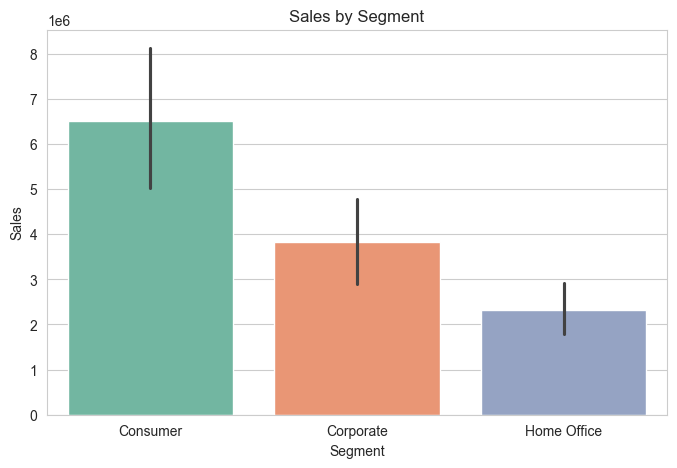

C:\Users\almagd\AppData\Local\Temp\ipykernel_10592\1720339190.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Profit", data=external, estimator=sum, palette="Set1")


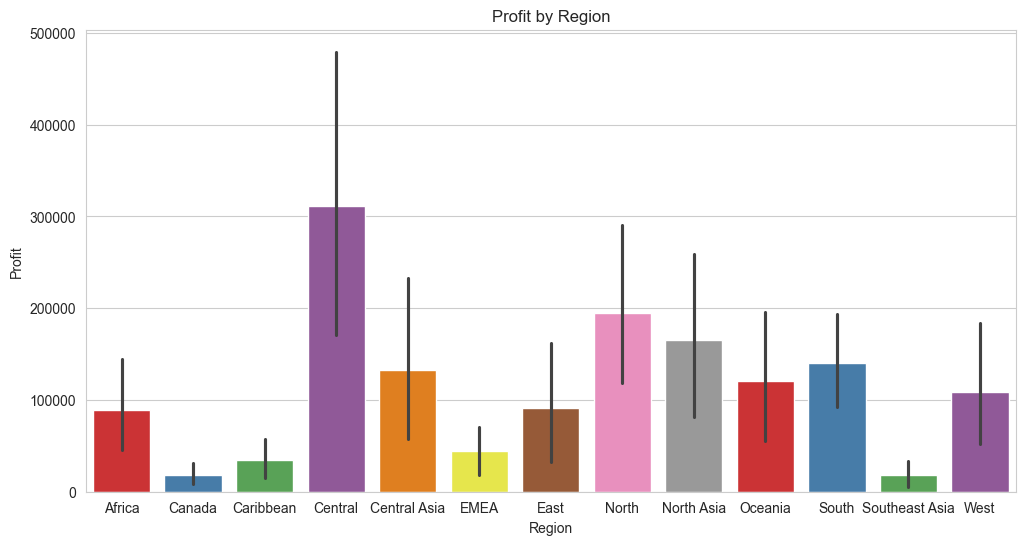

In [ ]:
# Group by Region, Market, Segment, and Order Priority
#reset_index():Makes sure the grouped categories become normal columns (not just index labels).
external = df.groupby(["Region","Market","Segment","Order Priority"])[["Sales","Profit","Quantity"]].sum().reset_index()

# Sales by Segment
plt.figure(figsize=(8,5))
#X-axis will show Segments (Consumer, Corporate, Home Office)
#data=external:Uses the grouped data we just made
#estimator=sum : Ensures sales values are summed (not averaged)
sns.barplot(x="Segment", y="Sales", data=external, estimator=sum, palette="Set2")
plt.title("Sales by Segment")
plt.show()

# Profit by Region
plt.figure(figsize=(12,6)) #Creates a new figure with size 8x5 inches.
sns.barplot(x="Region", y="Profit", data=external, estimator=sum, palette="Set1")
plt.title("Profit by Region")
plt.show()


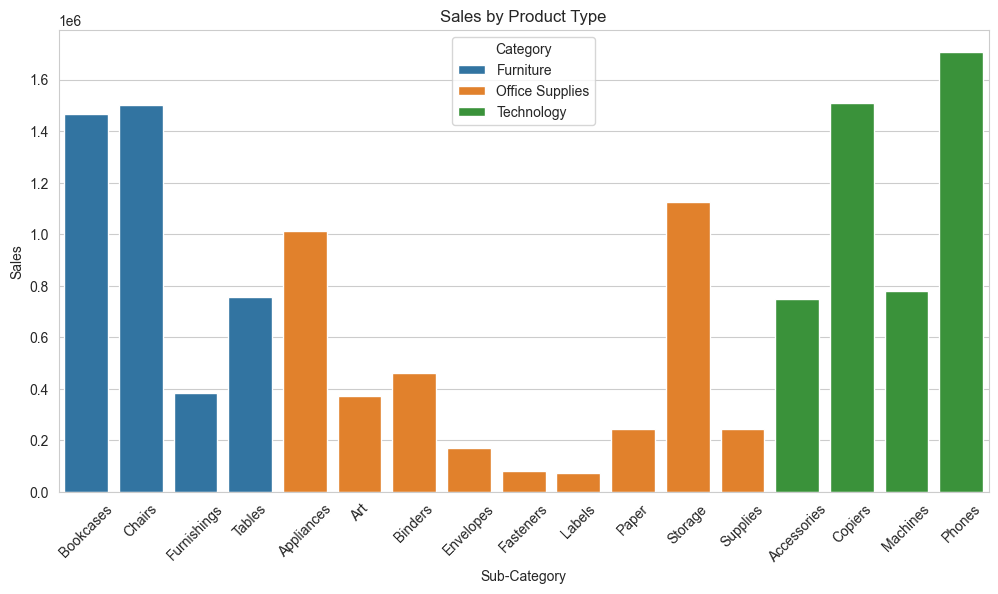

In [ ]:
# Group by Category and Sub-Category
product_sales = df.groupby(["Category","Sub-Category"])[["Sales","Quantity","Profit"]].sum().reset_index()

# Calculate Profit Margin = Profit / Sales
product_sales["Profit Margin"] = product_sales["Profit"] / product_sales["Sales"]

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x="Sub-Category", y="Sales", hue="Category", data=product_sales) #hue="Category" Different colors for each main Category (Furniture, Technology
plt.xticks(rotation=45) #Rotates x-axis labels by 45 degrees so the sub-category names don’t overlap
plt.title("Sales by Product Type")
plt.show()
#identify which products are profitable relative to sales volume.
#Each bar = Sales for a sub-category like Phones 
#Colors distinguish which main category it belongs to.
#higher bars higher sales


C:\Users\almagd\AppData\Local\Temp\ipykernel_10592\2542570061.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = df.groupby("Discount Bin")[["Quantity","Profit"]].mean().reset_index()


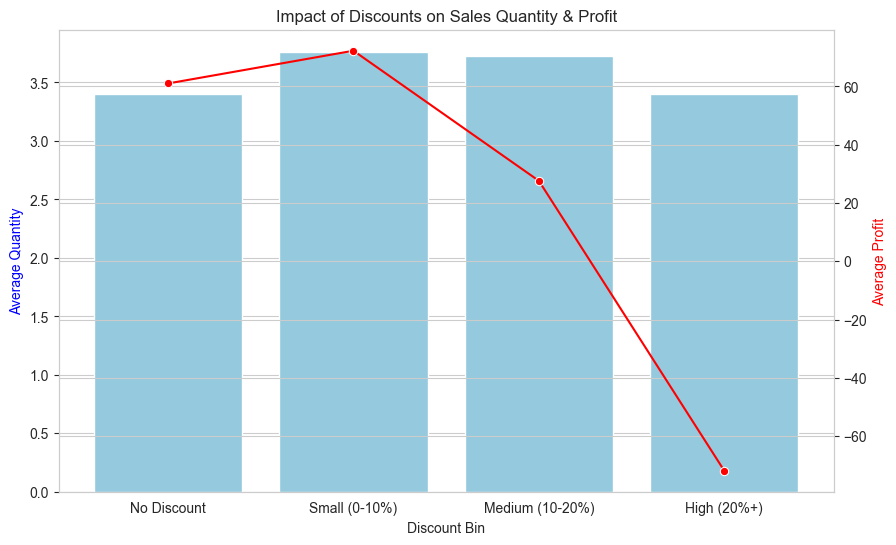

In [ ]:
# Create discount bins
bins = [0, 0.1, 0.2, 1.0]
labels = ["0-10% (Small)", "10-20% (Medium)", "20%+ (High)"]
df["Discount Bin"] = pd.cut(df["Discount"], bins=[-0.01, 0, 0.1, 0.2, 1], labels=["No Discount", "Small (0-10%)", "Medium (10-20%)", "High (20%+)"])

# Group by bins
discount_analysis = df.groupby("Discount Bin")[["Quantity","Profit"]].mean().reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(10,6))

sns.barplot(x="Discount Bin", y="Quantity", data=discount_analysis, color="skyblue", ax=ax1)
ax1.set_ylabel("Average Quantity", color="blue")

ax2 = ax1.twinx()
sns.lineplot(x="Discount Bin", y="Profit", data=discount_analysis, color="red", marker="o", ax=ax2)
ax2.set_ylabel("Average Profit", color="red")

plt.title("Impact of Discounts on Sales Quantity & Profit")
plt.show()


C:\Users\almagd\AppData\Local\Temp\ipykernel_10592\881639208.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = product_discount.pivot_table(index="Category", columns="Discount Bin", values="Profit")


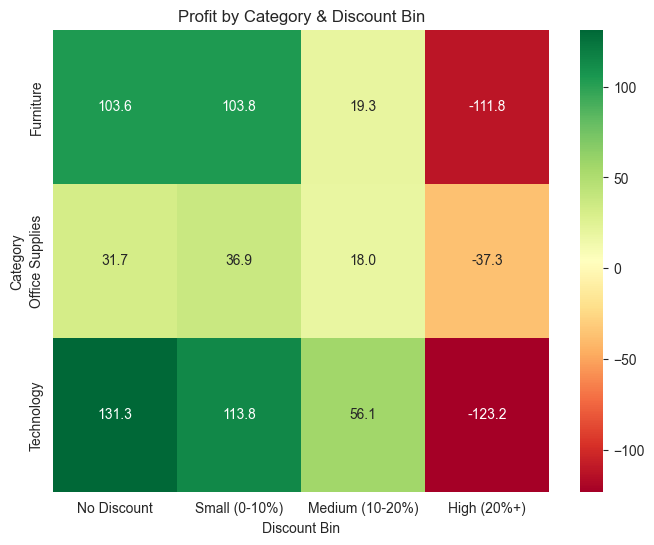

In [ ]:
# Group by Category and Discount Bin (with observed=True to silence the warning)
product_discount = df.groupby(["Category","Discount Bin"], observed=True)[["Quantity","Profit"]].mean().reset_index()

# Heatmap to see the relationship (using pivot_table instead of pivot)
#Reshapes the data into a matrix
pivot = product_discount.pivot_table(index="Category", columns="Discount Bin", values="Profit")

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="RdYlGn")
#fmt=".1f" shows numbers with one decimal place
plt.title("Profit by Category & Discount Bin")
plt.show
#Each cell in the heat map shows the average profit for a category + discount level

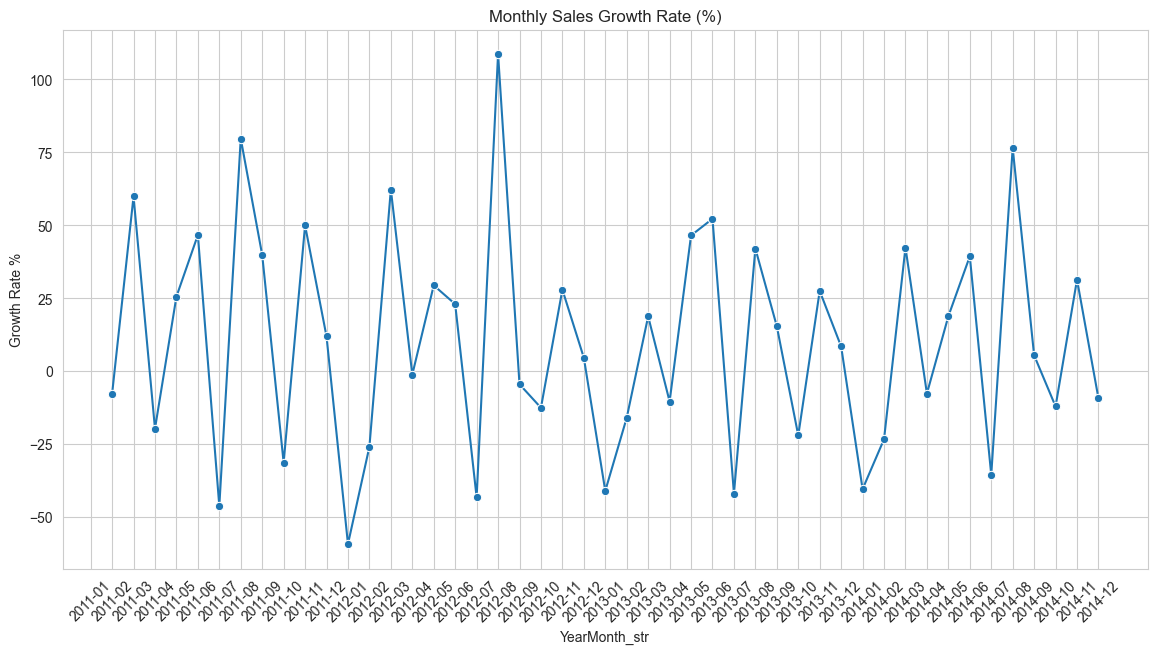

In [ ]:
# 1- (Growth Rate)

df["YearMonth"] = df["Order Date"].dt.to_period("M")#Creates a new column YearMonth from the Order Date
#dt.to_period("M") converts each order date into a year-month format
#lets us aggregate sales by month.
monthly_sales = df.groupby("YearMonth")["Sales"].sum().reset_index()
monthly_sales["Growth Rate"] = monthly_sales["Sales"].pct_change() * 100  #Calculates the percentage change in sales from one month to the next
#pct_change() computes growth

#transform YearMonth to string
monthly_sales["YearMonth_str"] = monthly_sales["YearMonth"].astype(str)

plt.figure(figsize=(14,7))
sns.lineplot(x="YearMonth_str", y="Growth Rate", data=monthly_sales, marker="o")
plt.title("Monthly Sales Growth Rate (%)")
plt.xticks(rotation=45)
plt.ylabel("Growth Rate %")
plt.show()

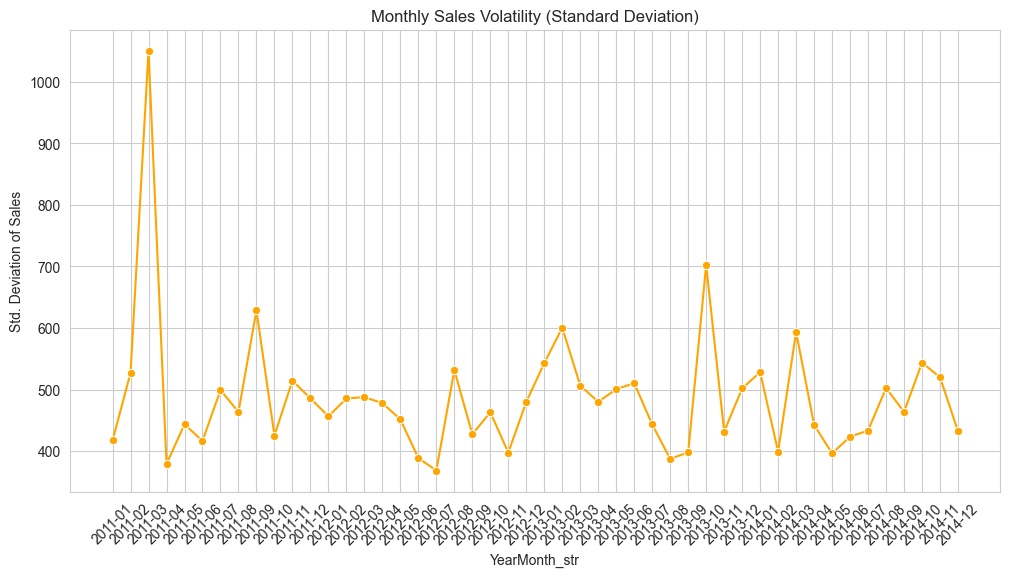

In [ ]:
# 2. (Volatility)
#Standard deviation is a measure of volatility higher values mean sales fluctuated a lot that month, lower values mean sales were more stable

volatility = df.groupby("YearMonth")["Sales"].std().reset_index()

# transform YearMonth to string
volatility["YearMonth_str"] = volatility["YearMonth"].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(x="YearMonth_str", y="Sales", data=volatility, marker="o", color="orange")
#x-axis = YearMonth_str (the months)
#y-axis = Sales (but here it represents standard deviation
plt.title("Monthly Sales Volatility (Standard Deviation)")
plt.xticks(rotation=45)
plt.ylabel("Std. Deviation of Sales")
plt.show()

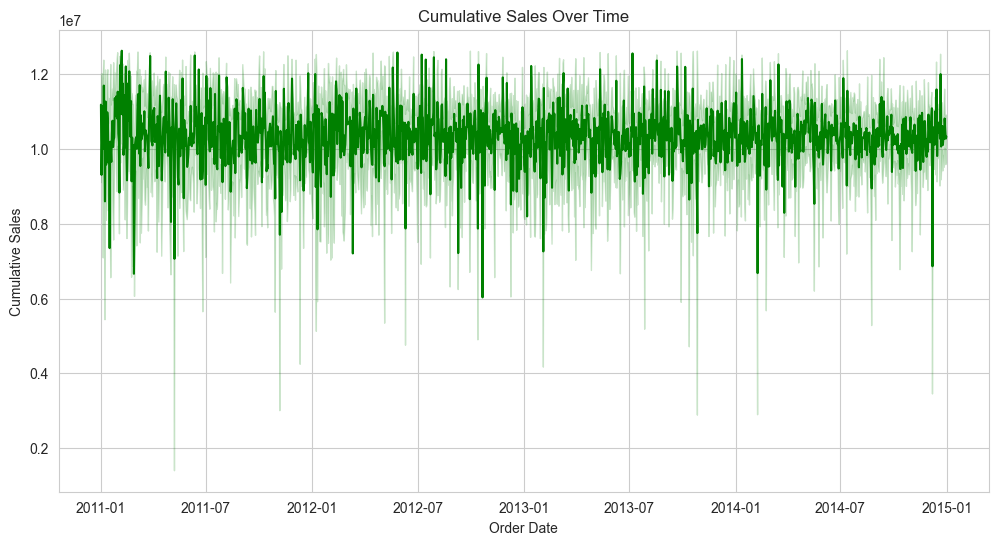

In [ ]:
# Creates a new column in the dataframe called Cumulative Sales
#it keeps adding each new order’s sales to the total so far
# ----------------------------
df["Cumulative Sales"] = df["Sales"].cumsum()

plt.figure(figsize=(12,6))
sns.lineplot(x="Order Date", y="Cumulative Sales", data=df, color="green")
plt.title("Cumulative Sales Over Time")
plt.ylabel("Cumulative Sales")
plt.show()
#shows how total sales accumulate over time.
#The slope of the line tells us how fast sales are growing
#A steep slope = strong sales in that period.......A flat slope = weak sales or no orders.

C:\Users\almagd\AppData\Local\Temp\ipykernel_4528\2349329010.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Value Segment", data=customer_sales, palette="Set2")


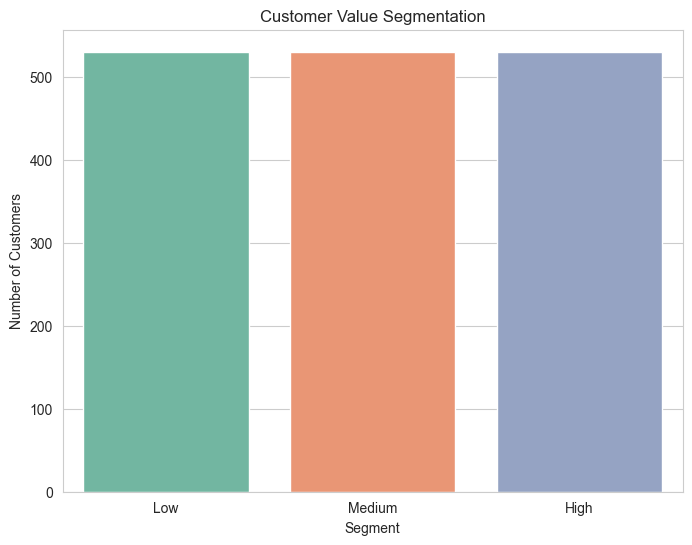

In [ ]:
# حساب إجمالي المبيعات لكل عميل
#For each customer, calculates the total sales amount

customer_sales = df.groupby("Customer ID")["Sales"].sum().reset_index()

# pd.qcut=divides customers into 3 equal-sized group based on their total sales value.Labels them as "Low", "Medium", and "High"
customer_sales["Value Segment"] = pd.qcut(customer_sales["Sales"], q=3, labels=["Low","Medium","High"])

plt.figure(figsize=(8,6))
sns.countplot(x="Value Segment", data=customer_sales, palette="Set2")
plt.title("Customer Value Segmentation")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()


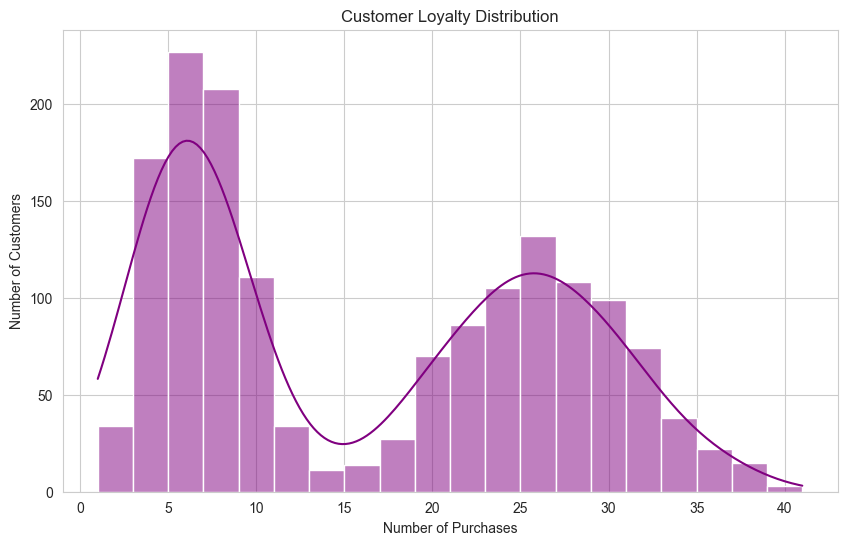

In [ ]:
# حساب عدد مرات الشراء لكل عميل
#For each customer, counts the unique Order IDs
#example: Customer C001 placed 3 different orders
loyalty = df.groupby("Customer ID")["Order ID"].nunique().reset_index()
loyalty.columns = ["Customer ID","Purchase Count"]
#"Customer ID"  who the customer is
#"Purchase Count" how many times they bought from us.

plt.figure(figsize=(10,6))
sns.histplot(loyalty["Purchase Count"], bins=20, kde=True, color="purple")
#loyalty["Purchase Count"] = number of purchases each customer made.
#kde=True adds a smooth line to show the distribution curve.
plt.title("Customer Loyalty Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()


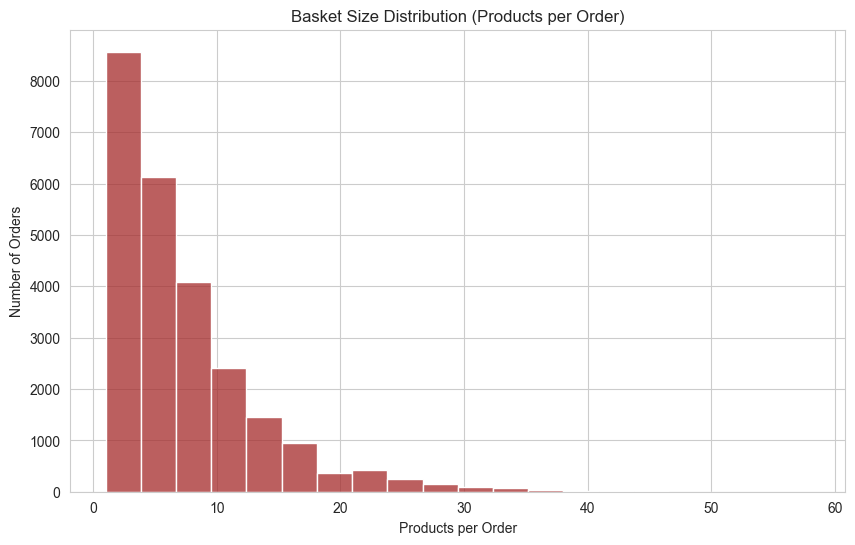

In [ ]:
# حساب متوسط عدد المنتجات في كل فاتورة( basket size)
#Groups the dataset by Order ID (each unique order)
#sums up the total number of items in that order
basket = df.groupby("Order ID")["Quantity"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.histplot(basket["Quantity"], bins=20, color="brown")
#basket["Quantity"] the number of products per order
#bins=20 divides the data into 20 ranges (0–2, 3–5,...)
plt.title("Basket Size Distribution (Products per Order)")
plt.xlabel("Products per Order")#X-axis = how many products in an order
plt.ylabel("Number of Orders")#Y-axis = how many orders fall into that basket size.
plt.show()
#This chart shows how many products customers usually buy per order

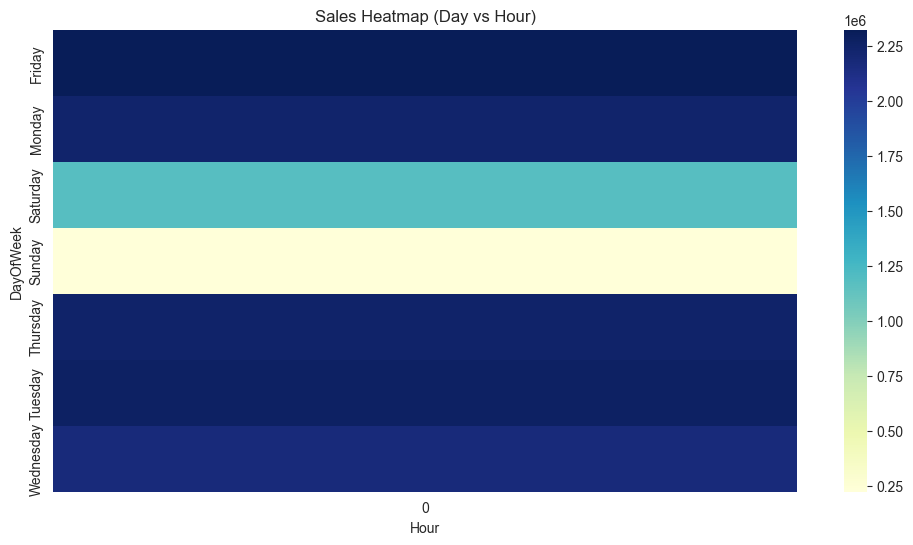

In [ ]:
# Convert Order Date to datetime
#errors="coerce" means if there are invalid values (like wrong date format), they’ll be replaced with NaT (Not a Time).
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")

# If "Order Time" exists, use it otherwise extract from Order Date
if "Order Time" in df.columns:
    df["Hour"] = pd.to_datetime(df["Order Time"], format="%H:%M:%S").dt.hour
else:
    df["Hour"] = df["Order Date"].dt.hour
#Checks if there’s a separate Order Time column
#If yes converts it to datetime and extracts the hour
#If no extracts the hour directly from Order Date


#Creates a new column DayOfWeek by extracting the day name (Monday, Tuesday...) from the order date.
df["DayOfWeek"] = df["Order Date"].dt.day_name()

# Pivot Table for Heatmap
#rows = days of the week
#columns = hours of the day
#sales are summed up.
pivot = df.pivot_table(values="Sales", index="DayOfWeek", columns="Hour", aggfunc="sum")

# Plot
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Sales Heatmap (Day vs Hour)")
plt.show()

#Each cell is colored according to the sales amount
#Bigger sales = darker/stronger color.

